###**Pre-procesamiento de textos y generación de perfiles de frecuencia léxicos con NLTK** 

### Requisitos técnicos
Para esta demostración no necesitas ningún conocimiento técnico previo. Yo te voy a guiar por cada paso de este tutorial. 
- Vamos a utilizar los datos **'muestra.txt'** que se encuentra en D2L. Luego, vas a utilizar la composición que escribiste sobre Gabriel García Marquez. 

### Objetivos
1. Obtener las palabras más frecuentes de tus composiciones
2. Obtener las secuencias de palabras (colocaciones) más frecuentes de tus composiciones (Bigrams)
3. Crearemos un gráfico de nuestros resultados

## Introducción

El Natural Language Toolkit ([NLKT](https://www.nltk.org/)) es un módulo muy popular del lenguaje de programación de Python  que se utiliza para varias tareas de NLP.

Para esta presentación de NLTK nosotros vamos a realizar dos tareas simples y prácticas de NLP que creo les van a servir mucho en el futuro:

1. Limpieza (Preprocesamiento) del texto.
2. Creación de un perfil léxico


Para el pre-procesamiento nosotros ya hemos utilizados comandos en la terminal de Linux. Verás que con NLTK esto se hará muy fácilmente. Para la creación del perfil léxico, vamos a presentar varias funcionalidades de NLTK para crear un perfil de frecuencia léxico de colocaciones o n-grams de nuestros textos.  


**Paso 1. Importamos el módulo y subimos el texto que vamos a procesar**

In [1]:
import nltk # importamos el módulo

Descargamos el paquete 'punkt' desde NLTK. Esto será necesario para evitar mensajes de error más abajo. 

In [2]:
 nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Para leer un texto en Python abrimos el archivo, lo leemos y cerramos el texto. Las siguientes líneas de código imprime los primeros 1000 caracteres del texto. Los datos que utilizaremos serán composiciones de estudiantes evaluadas en el nivel de Upper Intermediate.

**Ojo**: debes primero montar el Google Drive al Colab y luego copiar el *path* del archivo de texto. Luego utilizamos la función open() con el *path* como argumento. Incluímos también la decodificación utf-8 para que reconozca los caracateres del español y le decimos a Python que el archivo que introducimos es de modo 'r' (reading) para lectura. Así:


In [4]:
archivo = open("/content/muestra.txt", mode='r', encoding='utf-8')

In [5]:
texto = archivo.read() # leemos el archivo y lo montamos en la memoria mediante una nueva variable llamada texto
archivo.close() # cerramos el archivo anterior

In [7]:
print(texto[:500], "...") # imprimimos el texto que subimos a la memoria de Python

﻿
El enfoque de la educación en la universidad es principalmente en clases, libros de texto y exámenes. El campus se enfoca constantemente en las calificaciones sin prestar atención a la aplicación de habilidades del mundo real. Por ejemplo, muchos estudiantes que estudian medicina tienen que buscar pasantías u otras oportunidades externas para tener éxito después de la universidad.

Por último, el campus no promueve la salud y el bienestar tanto como debería. Hay muchos recursos disponibles en  ...


**Paso 1.2. Normalización, tokenización y limpieza de datos: Pre-procesamiento**

Para que la máquina pueda saber que datos son importantes para nosotros, debemos hacer una tarea de pre-procesamiento. Aquí filtramos datos que no nos son útiles. Para esta actividad vamos a realizar 3 pasos de pre-procesamiento: normalización de minúsculas a mayúsculas, tokenización y limpieza de caractares ortográficos. 
Primero, normalizamos el texto para que todos los caracteres estén en minuscula y verificamos con la función print()

In [9]:
texto = texto.lower()
print(texto[:1000], "...")

﻿
el enfoque de la educación en la universidad es principalmente en clases, libros de texto y exámenes. el campus se enfoca constantemente en las calificaciones sin prestar atención a la aplicación de habilidades del mundo real. por ejemplo, muchos estudiantes que estudian medicina tienen que buscar pasantías u otras oportunidades externas para tener éxito después de la universidad.

por último, el campus no promueve la salud y el bienestar tanto como debería. hay muchos recursos disponibles en la comunidad para aliviar el estrés de los estudiantes durante y después de su tiempo en la universidad, pero los estudiantes solo pueden aprender sobre ellos si se ven activamente.

en conclusión, es responsabilidad de los campus preparar a los estudiantes para la vida real y no lo hacen. wendy priesnitz dijo: “nuestra sociedad basada en la información y en rápido movimiento necesita con urgencia a personas que saben cómo encontrar hechos en lugar de memorizarlos, y que saben cómo hacer frente 

Ahora estamos listos para tokenizar con NLTK tal como lo hicimos con nuestro script de tokenización. 

In [10]:
tokens = nltk.word_tokenize(texto)
print(tokens)

['\ufeff', 'el', 'enfoque', 'de', 'la', 'educación', 'en', 'la', 'universidad', 'es', 'principalmente', 'en', 'clases', ',', 'libros', 'de', 'texto', 'y', 'exámenes', '.', 'el', 'campus', 'se', 'enfoca', 'constantemente', 'en', 'las', 'calificaciones', 'sin', 'prestar', 'atención', 'a', 'la', 'aplicación', 'de', 'habilidades', 'del', 'mundo', 'real', '.', 'por', 'ejemplo', ',', 'muchos', 'estudiantes', 'que', 'estudian', 'medicina', 'tienen', 'que', 'buscar', 'pasantías', 'u', 'otras', 'oportunidades', 'externas', 'para', 'tener', 'éxito', 'después', 'de', 'la', 'universidad', '.', 'por', 'último', ',', 'el', 'campus', 'no', 'promueve', 'la', 'salud', 'y', 'el', 'bienestar', 'tanto', 'como', 'debería', '.', 'hay', 'muchos', 'recursos', 'disponibles', 'en', 'la', 'comunidad', 'para', 'aliviar', 'el', 'estrés', 'de', 'los', 'estudiantes', 'durante', 'y', 'después', 'de', 'su', 'tiempo', 'en', 'la', 'universidad', ',', 'pero', 'los', 'estudiantes', 'solo', 'pueden', 'aprender', 'sobre', '

Si notas en los datos hay varios caracteres no alfanuméricos que deben ser eliminados de nuestro corpus. Si no los eliminamos estaríamos contando contenido ortográfico que no nos interesa. Cualquier marca de puntuación en nuestros datos la podemos remover mediante el método *.isalpha* de Python. Este método sencillo chequea si cada token es alfanumérico y regresa una respuesta de cierto o falso. Para nuestro propósito, haremos una lista y le diremos a Python que sólo ponga en la lista todo aquel token que es alfanumérico. 

In [11]:
words = [word for word in tokens if word.isalpha()] # aquí utilizamos un for loop: va token por token y revisa si es .isalpha=TRUE. Si es así lo deja en la lista. 
print(words) # revisamos

['el', 'enfoque', 'de', 'la', 'educación', 'en', 'la', 'universidad', 'es', 'principalmente', 'en', 'clases', 'libros', 'de', 'texto', 'y', 'exámenes', 'el', 'campus', 'se', 'enfoca', 'constantemente', 'en', 'las', 'calificaciones', 'sin', 'prestar', 'atención', 'a', 'la', 'aplicación', 'de', 'habilidades', 'del', 'mundo', 'real', 'por', 'ejemplo', 'muchos', 'estudiantes', 'que', 'estudian', 'medicina', 'tienen', 'que', 'buscar', 'pasantías', 'u', 'otras', 'oportunidades', 'externas', 'para', 'tener', 'éxito', 'después', 'de', 'la', 'universidad', 'por', 'último', 'el', 'campus', 'no', 'promueve', 'la', 'salud', 'y', 'el', 'bienestar', 'tanto', 'como', 'debería', 'hay', 'muchos', 'recursos', 'disponibles', 'en', 'la', 'comunidad', 'para', 'aliviar', 'el', 'estrés', 'de', 'los', 'estudiantes', 'durante', 'y', 'después', 'de', 'su', 'tiempo', 'en', 'la', 'universidad', 'pero', 'los', 'estudiantes', 'solo', 'pueden', 'aprender', 'sobre', 'ellos', 'si', 'se', 'ven', 'activamente', 'en', 'c

Ahora podemos hacer una funcionalidad extra de NLTK. Este módulo nos da la opción de filtrar *stopwords*. Si te fijas cuando buscas en Google, el buscador ignora selectivamente algunas partes de tu búsqueda y selecciona sólo las partes importantes. Pues precisamente, los *stopwords* listas de palabras frecuentes que fueron programadas para ser ignoradas por los motores de búsqueda. Esto se hace para evitar un uso innecesario de memoria. Nosotros podemos ver que listas de palabras hay en español que fueron ignoradas:



In [12]:
nltk.download('stopwords') # ojo: debemos instalar primero esta funcionalidad
from nltk.corpus import stopwords # importamos
print(stopwords.words('spanish')) # imprimimos

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro'

Como vemos, las palabras filtradas constituyen elementos gramaticales. Ahora la pregunta que el lingüista se debe hacer es la siguiente: ¿Es conveniente para nosotros filtrar estas palabras en nuestros datos?

**filtramos los *stopwords***

In [13]:
stop_words = set(stopwords.words('spanish')) # creamos una variables con todos los stopwords para el idioma español
words = [w for w in words if not w in stop_words] # volvemos a hacer un for loop para que deje en mi lista todos los tokens que no son stopwords. 
print(words)

['enfoque', 'educación', 'universidad', 'principalmente', 'clases', 'libros', 'texto', 'exámenes', 'campus', 'enfoca', 'constantemente', 'calificaciones', 'prestar', 'atención', 'aplicación', 'habilidades', 'mundo', 'real', 'ejemplo', 'estudiantes', 'estudian', 'medicina', 'buscar', 'pasantías', 'u', 'oportunidades', 'externas', 'tener', 'éxito', 'después', 'universidad', 'último', 'campus', 'promueve', 'salud', 'bienestar', 'debería', 'recursos', 'disponibles', 'comunidad', 'aliviar', 'estrés', 'estudiantes', 'después', 'tiempo', 'universidad', 'estudiantes', 'solo', 'pueden', 'aprender', 'si', 'ven', 'activamente', 'conclusión', 'responsabilidad', 'campus', 'preparar', 'estudiantes', 'vida', 'real', 'hacen', 'wendy', 'priesnitz', 'dijo', 'sociedad', 'basada', 'información', 'rápido', 'movimiento', 'necesita', 'urgencia', 'personas', 'saben', 'cómo', 'encontrar', 'hechos', 'lugar', 'memorizarlos', 'saben', 'cómo', 'hacer', 'frente', 'cambio', 'manera', 'creativa', 'aprendes', 'cosas',

Como vemos removimos todos los *stopwords* de los datos. 

####2. Perfil de frecuencia léxico de n-grams

**2.1. Unigrams**

En esta segunda parte de la clase, vamos a crear un perfil de frecuencia léxico. Incluiremos la frecuencia de unigrams y bigrams. los *n-grams* son combinaciones de palabras cuyas ocurrencias están altamente correlacionada. Ejemplo: vino tinto, redes sociales, etc.

Saber esto nos va a ayudar a entender la competencia fraseológica del estudiante y, por ende, su desarrollo lingüístico. 

In [27]:
myTokenFD = nltk.FreqDist(words) # utilizamos la función nltk.FreqDist() en nuestra lista de tokens
print(myTokenFD) # imprimimos el resultado

<FreqDist with 1706 samples and 3446 outcomes>


Nota que el resultado nos da 1706/3446. Esto es algo que se conoce como el *Type-Token ratio* y se utiliza para saber la variedad léxica del texto. El primer número es el *type* (1706) y nos muestra el número de tokens únicos en el texto. El otro número o *token* es precisamente todas las instancias de palabras que hay en nuestra lista. Así, el texto tiene 3446 palabras con 1706 palabras únicas.  

Ahora veamos que otra sorpresa nos da esta función de NLTK:

In [15]:
for token in list(myTokenFD.items()): # en este for loop vamos token por token en nuestra lista mediante la función .items().
  print(token[0], token[1]) # luego imprimimos el token en la posición [0], y el token en la segunda posición [1]. 

enfoque 2
educación 7
universidad 16
principalmente 2
clases 4
libros 5
texto 4
exámenes 2
campus 13
enfoca 3
constantemente 2
calificaciones 2
prestar 2
atención 5
aplicación 2
habilidades 10
mundo 12
real 11
ejemplo 5
estudiantes 37
estudian 2
medicina 2
buscar 2
pasantías 2
u 4
oportunidades 7
externas 2
tener 18
éxito 10
después 12
último 5
promueve 2
salud 8
bienestar 3
debería 10
recursos 7
disponibles 2
comunidad 4
aliviar 2
estrés 3
tiempo 8
solo 8
pueden 18
aprender 8
si 15
ven 2
activamente 2
conclusión 3
responsabilidad 4
preparar 5
vida 43
hacen 3
wendy 2
priesnitz 2
dijo 8
sociedad 5
basada 2
información 4
rápido 2
movimiento 4
necesita 4
urgencia 2
personas 30
saben 4
cómo 12
encontrar 7
hechos 2
lugar 12
memorizarlos 2
hacer 12
frente 2
cambio 5
manera 16
creativa 2
aprendes 2
cosas 8
escuela 17
general 5
depende 3
tomar 2
iniciativa 2
mejor 11
jóvenes 3
período 2
transición 2
considera 1
estudiante 22
propósito 1
fase 1
futuro 6
través 6
independencia 1
simultáneamente 

In [20]:
print("Estas son las 10 palabras más frecuentes en los datos") # título de nuestra tabla
print("Token:\t\tFrecuencia") # subtítulo separados por tabulaciones (\t)
for i in myTokenFD.most_common(10): # imprimimos mediante un for loop los 20 tokens más comunes. 
    print("{}\t\t{}".format(i[0],i[1])) # imprimimos 3 datos separados por tabulaciones

Estas son las 10 palabras más frecuentes en los datos
Token:		Frecuencia
vida		43
estudiantes		37
puede		35
ser		32
personas		30
película		29
estudiante		22
tener		18
pueden		18
trabajo		18


**2.2. Bigrams**

Ahora nos interesa encontrar las combinaciones de dos palabras más frecuentes de nuestro texto (i.e., bigrams). Haremos algo muy parecido a lo que hicimos anteriormente con los unigrams.  

In [25]:
myTokenBigrams = nltk.ngrams(words, 2) # creamos una variable con secuencias de dos tokens
bigrams = list(myTokenBigrams) # convertimos la variable en una lista
myBigramFD = nltk.FreqDist(bigrams) # creamos el perfil de frecuencia
print(myBigramFD) # Type-Token Ratio

<FreqDist with 3169 samples and 3445 outcomes>


In [26]:
print("Estos son los 10 bigrams más frecuentes de los datos:")
print("Bigram:\t\tFrecuencia")
for ngram in list(myBigramFD.most_common(10)): # imprimimos elegantemente
    print(" ".join(ngram[0]), "\t", ngram[1])
print("Type/Token ratio for bigrams:", myBigramFD)


Estos son los 10 bigrams más frecuentes de los datos:
Bigram:		Frecuencia
calidad vida 	 14
puede ser 	 9
redes sociales 	 8
vista higher 	 6
higher learning 	 6
mundo real 	 5
vida real 	 5
señores vista 	 5
roger gual 	 5
libros texto 	 4
Type/Token ratio for bigrams: <FreqDist with 3169 samples and 3445 outcomes>


**2.3. Gráficos**

In [28]:
import matplotlib.pyplot as plt # importamos Matplotlib, el módulo de gráficos de Python por excelencia
import seaborn as sns # importamos seaborn, una libreria de Matplotlib para visualización de datos

In [29]:
common_bigrams = [bigram[0] for bigram in myBigramFD.most_common(10)] # Asignamos una variable que contenga el primer item de la lista de bigram mediante un for loop. Sólo sacamos los 10 más comunes
common_bigrams = [' '.join(i) for i in common_bigrams] # como un bigram se separa por comas, creamos un for loop para unir los bigrams por espacios. Esto sólo se utiliza para unir los bigrams
bigram_counts = [bigram[1] for bigram in myBigramFD.most_common(10)] # sacamos el conteo de los 10 bigrams más comunes mediante un for loop.


Text(0.5, 1.0, 'Los 10 bigrams más utilizados en los datos')

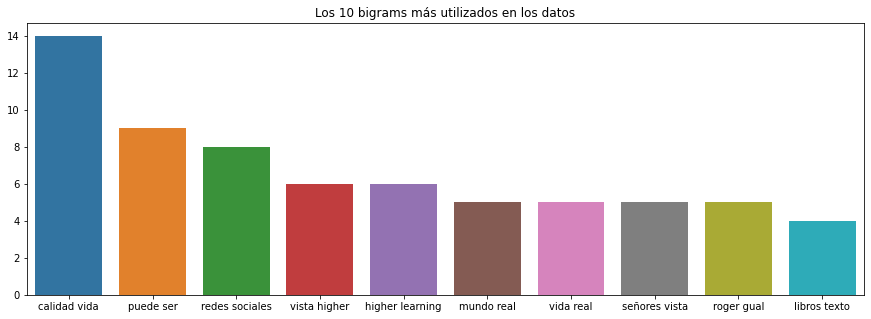

In [33]:
fig2 = plt.figure(figsize=(15,5)) # creamos la configuración de nuestro gráfico
sns.barplot(x= common_bigrams, y= bigram_counts) # asignamos las variables para el eje vertical y el eje horizontal
plt.title('Los 10 bigrams más utilizados en los datos') # le ponemos un título a nuestro gráfico

# **Ahora tú! **

Analiza los unigrams y bigrams más frecuentes de tu ensayo. Utiliza las siguiente líneas de código.

### **0. Preprocesamiento**

In [35]:
archivo = open("/content/Nord.txt", mode='r', encoding='utf-8')

In [36]:
texto = archivo.read() # leemos el archivo y lo montamos en la memoria mediante una nueva variable llamada texto
archivo.close() # cerramos el archivo anterior

In [38]:
print(texto[:500], "...") # imprimimos el texto que subimos a la memoria de Python

﻿Kanae María Nord SPAN 501
Topics in Linguistics
Reflexión Personal
Discurso de Gabriel García Márquez
‘La Soledad de América Latina
Profesor Falcón Restrepo Ramos
 
 
El discurso que dio Gabriel García Márquez el 8 de diciembre de 1982 nos presenta la perspectiva que tiene el resto del mundo sobre Latinoamérica, nos relata eventos históricos recientes del continente, y finalmente nos presenta que la consecuencia de esas dos cosas fue causar aislamiento de estos países.
Gabriel García Márquez em ...


In [39]:
texto = texto.lower()
print(texto[:500], "...")

﻿kanae maría nord span 501
topics in linguistics
reflexión personal
discurso de gabriel garcía márquez
‘la soledad de américa latina
profesor falcón restrepo ramos
 
 
el discurso que dio gabriel garcía márquez el 8 de diciembre de 1982 nos presenta la perspectiva que tiene el resto del mundo sobre latinoamérica, nos relata eventos históricos recientes del continente, y finalmente nos presenta que la consecuencia de esas dos cosas fue causar aislamiento de estos países.
gabriel garcía márquez em ...


In [40]:
tokens = nltk.word_tokenize(texto)
print(tokens)

['\ufeffkanae', 'maría', 'nord', 'span', '501', 'topics', 'in', 'linguistics', 'reflexión', 'personal', 'discurso', 'de', 'gabriel', 'garcía', 'márquez', '‘', 'la', 'soledad', 'de', 'américa', 'latina', 'profesor', 'falcón', 'restrepo', 'ramos', 'el', 'discurso', 'que', 'dio', 'gabriel', 'garcía', 'márquez', 'el', '8', 'de', 'diciembre', 'de', '1982', 'nos', 'presenta', 'la', 'perspectiva', 'que', 'tiene', 'el', 'resto', 'del', 'mundo', 'sobre', 'latinoamérica', ',', 'nos', 'relata', 'eventos', 'históricos', 'recientes', 'del', 'continente', ',', 'y', 'finalmente', 'nos', 'presenta', 'que', 'la', 'consecuencia', 'de', 'esas', 'dos', 'cosas', 'fue', 'causar', 'aislamiento', 'de', 'estos', 'países', '.', 'gabriel', 'garcía', 'márquez', 'empieza', 'su', 'discurso', 'hablándonos', 'sobre', 'la', 'fascinación', 'que', 'tiene', 'el', 'resto', 'de', 'mundo', 'por', 'américa', 'latina', 'como', 'un', 'lugar', 'lleno', 'de', 'magia', 'y', 'de', 'cosas', 'maravillosas', '.', 'explica', 'que', 'l

In [41]:
words = [word for word in tokens if word.isalpha()] # aquí utilizamos un for loop: va token por token y revisa si es .isalpha=TRUE. Si es así lo deja en la lista. 
print(words) # revisamos

['maría', 'nord', 'span', 'topics', 'in', 'linguistics', 'reflexión', 'personal', 'discurso', 'de', 'gabriel', 'garcía', 'márquez', 'la', 'soledad', 'de', 'américa', 'latina', 'profesor', 'falcón', 'restrepo', 'ramos', 'el', 'discurso', 'que', 'dio', 'gabriel', 'garcía', 'márquez', 'el', 'de', 'diciembre', 'de', 'nos', 'presenta', 'la', 'perspectiva', 'que', 'tiene', 'el', 'resto', 'del', 'mundo', 'sobre', 'latinoamérica', 'nos', 'relata', 'eventos', 'históricos', 'recientes', 'del', 'continente', 'y', 'finalmente', 'nos', 'presenta', 'que', 'la', 'consecuencia', 'de', 'esas', 'dos', 'cosas', 'fue', 'causar', 'aislamiento', 'de', 'estos', 'países', 'gabriel', 'garcía', 'márquez', 'empieza', 'su', 'discurso', 'hablándonos', 'sobre', 'la', 'fascinación', 'que', 'tiene', 'el', 'resto', 'de', 'mundo', 'por', 'américa', 'latina', 'como', 'un', 'lugar', 'lleno', 'de', 'magia', 'y', 'de', 'cosas', 'maravillosas', 'explica', 'que', 'la', 'evidencia', 'de', 'esto', 'existe', 'en', 'el', 'libro'

In [42]:
nltk.download('stopwords') # ojo: debemos instalar primero esta funcionalidad
from nltk.corpus import stopwords # importamos
print(stopwords.words('spanish')) # imprimimos

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', '

In [43]:
stop_words = set(stopwords.words('spanish')) # creamos una variables con todos los stopwords para el idioma español
words = [w for w in words if not w in stop_words] # volvemos a hacer un for loop para que deje en mi lista todos los tokens que no son stopwords. 
print(words)

['maría', 'nord', 'span', 'topics', 'in', 'linguistics', 'reflexión', 'personal', 'discurso', 'gabriel', 'garcía', 'márquez', 'soledad', 'américa', 'latina', 'profesor', 'falcón', 'restrepo', 'ramos', 'discurso', 'dio', 'gabriel', 'garcía', 'márquez', 'diciembre', 'presenta', 'perspectiva', 'resto', 'mundo', 'latinoamérica', 'relata', 'eventos', 'históricos', 'recientes', 'continente', 'finalmente', 'presenta', 'consecuencia', 'dos', 'cosas', 'causar', 'aislamiento', 'países', 'gabriel', 'garcía', 'márquez', 'empieza', 'discurso', 'hablándonos', 'fascinación', 'resto', 'mundo', 'américa', 'latina', 'lugar', 'lleno', 'magia', 'cosas', 'maravillosas', 'explica', 'evidencia', 'existe', 'libro', 'escrito', 'antonio', 'pigafetta', 'navegante', 'iba', 'magallanes', 'primera', 'navegación', 'alrededor', 'mundo', 'hace', 'entender', 'perspectiva', 'latinoamérica', 'lugar', 'mágico', 'empezó', 'libro', 'pues', 'crónica', 'parece', 'ser', 'aventura', 'imaginación', 'presentar', 'primer', 'punto'

**1. Unigrams**

In [44]:
myTokenFD = nltk.FreqDist(words) # utilizamos la función nltk.FreqDist() en nuestra lista de tokens
print(myTokenFD) # imprimimos el resultado

<FreqDist with 177 samples and 264 outcomes>


In [ ]:
for token in list(myTokenFD.items()): # en este for loop vamos token por token en nuestra lista mediante la función .items().
  print(token[0], token[1]) # luego imprimimos el token en la posición [0], y el token en la segunda posición [1]. 

In [46]:
print("Estas son las 10 palabras más frecuentes en los datos") # título de nuestra tabla
print("Token:\t\tFrecuencia") # subtítulo separados por tabulaciones (\t)
for i in myTokenFD.most_common(10): # imprimimos mediante un for loop los 20 tokens más comunes. 
    print("{}\t\t{}".format(i[0],i[1])) # imprimimos 3 datos separados por tabulaciones

Estas son las 10 palabras más frecuentes en los datos
Token:		Frecuencia
mundo		9
márquez		8
latinoamérica		7
discurso		6
garcía		5
resto		5
gabriel		4
américa		4
latina		4
perspectiva		4


**2. Bigrams**

In [47]:
myTokenBigrams = nltk.ngrams(words, 2) # creamos una variable con secuencias de dos tokens
bigrams = list(myTokenBigrams) # convertimos la variable en una lista
myBigramFD = nltk.FreqDist(bigrams) # creamos el perfil de frecuencia
print(myBigramFD) # Type-Token Ratio

<FreqDist with 234 samples and 263 outcomes>


In [48]:
print("Estos son los 10 bigrams más frecuentes de los datos:")
print("Bigram:\t\tFrecuencia")
for ngram in list(myBigramFD.most_common(10)): # imprimimos elegantemente
    print(" ".join(ngram[0]), "\t", ngram[1])
print("Type/Token ratio for bigrams:", myBigramFD)


Estos son los 10 bigrams más frecuentes de los datos:
Bigram:		Frecuencia
garcía márquez 	 5
resto mundo 	 5
gabriel garcía 	 4
américa latina 	 4
discurso dio 	 2
dio gabriel 	 2
márquez diciembre 	 2
perspectiva resto 	 2
mundo latinoamérica 	 2
relata eventos 	 2
Type/Token ratio for bigrams: <FreqDist with 234 samples and 263 outcomes>


**2.3. Gráficos**

In [49]:
import matplotlib.pyplot as plt # importamos Matplotlib, el módulo de gráficos de Python por excelencia
import seaborn as sns # importamos seaborn, una libreria de Matplotlib para visualización de datos

In [50]:
common_bigrams = [bigram[0] for bigram in myBigramFD.most_common(10)] # Asignamos una variable que contenga el primer item de la lista de bigram mediante un for loop. Sólo sacamos los 10 más comunes
common_bigrams = [' '.join(i) for i in common_bigrams] # como un bigram se separa por comas, creamos un for loop para unir los bigrams por espacios. Esto sólo se utiliza para unir los bigrams
bigram_counts = [bigram[1] for bigram in myBigramFD.most_common(10)] # sacamos el conteo de los 10 bigrams más comunes mediante un for loop.


Text(0.5, 1.0, 'Los 10 bigrams más utilizados en los datos')

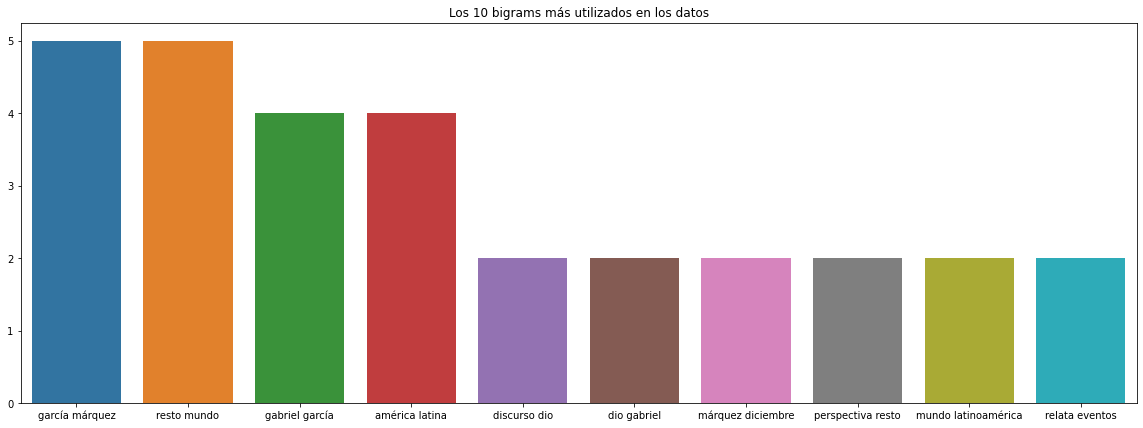

In [51]:
fig2 = plt.figure(figsize=(20,7)) # creamos la configuración de nuestro gráfico
sns.barplot(x= common_bigrams, y= bigram_counts) # asignamos las variables para el eje vertical y el eje horizontal
plt.title('Los 10 bigrams más utilizados en los datos') # le ponemos un título a nuestro gráfico

**Reflexión**

¿Qué fue lo que más te gustó? ¿Cómo puedes utilizar NLTK para tu propio trabajo y estudio en español?